In [62]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline

In [63]:
if tf.test.gpu_device_name():
    print('Default GPU {}'.format(tf.test.gpu_device_name()))
else:    
    print('NO GPU DETECTED')
    

Default GPU /gpu:0


In [64]:
#print(len(data_loc))

    

In [65]:
data0 = pd.read_csv('data/traces/new_traces/app.txt', header=None, names=['id','time','device_id','package_name','application','is_system_app'])

data0.insert(3, 'day_int', 0.0)
data0.insert( 4, 'hour_int', 0.0)
data0.insert(5, 'min_int', 0.0)
data0.insert(6, 'sec_int', 0.0)


data0.head()

,id,time,device_id,day_int,hour_int,min_int,sec_int,package_name,application,is_system_app
0,11187,1500549607470,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.0,0.0,0.0,0.0,com.sec.android.app.launcher,TouchWiz Home,1
1,11188,1500549607799,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.0,0.0,0.0,0.0,com.android.systemui,System UI,1
2,11186,1500549559847,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.0,0.0,0.0,0.0,com.android.settings,Settings,1
3,11184,1500549552940,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.0,0.0,0.0,0.0,com.sec.android.app.launcher,TouchWiz Home,1
4,11185,1500549553892,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.0,0.0,0.0,0.0,com.android.systemui,System UI,1


In [66]:
print(len(data0) )

5801


In [67]:
print(datetime.datetime.fromtimestamp(data0.time[0]//1000))

2017-07-20 20:20:07


In [68]:
date = data0.time 
#duration = data0.duration
week_dic = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday':7}

#duration = [dur for dur in duration if dur < 0 dur:0]
time_ = [datetime.datetime.fromtimestamp(int(d)//1000) for d in date]
time = [str(times)[11:] for times in time_]
date_ = [str(times)[:11] for times in time_]
week_day = [datetime.datetime.strptime(str(day), '%Y-%M-%d ').strftime('%A') for day in date_]

time_int = [time_string.split(':') for time_string in time]
time_int_ = [int(''.join(time_scatter)) for time_scatter in time_int]

hour_int = [int(hour[0])/100  for hour in time_int]
min_int = [int(hour[1])/100  for hour in time_int]
sec_int = [int(hour[2])/100  for hour in time_int]

data0.hour_int = hour_int
data0.min_int = min_int
data0.sec_int = sec_int


data0.day_int = [week_dic[day]/10 for day in week_day]
data0.day = week_day
data0.time_24h = time
data0.time_int = time_int_
number_sessions = {}
time_by_app = {}
avg_app_time = {}
data0.date = date_

freq_ = 0
freq = {}
new_ids = {}
new_id = 0

for i in range(len(data0)):
        names = data0.application[i]      
        if names not in freq:
            freq[names] = 1
        else:
            freq[names] += 1
        
        if names not in new_ids:
            new_ids[names] = new_id
            new_id +=1
       
        if names not in number_sessions:
            number_sessions[names] = 1
            #time_by_app[names] = duration[i]
        else:
            number_sessions[names] += 1
            #time_by_app[names] += duration[i]
#data0.id = [for i in data0.application if new_ids[i] == 'SpringBoard']
data0.id = [new_ids[i] for i in data0.application]  
#n = 0
#data0.id = [n for id_ in data0.id if id_ == 1]
avg = [float(time_by_app[i])/float(number_sessions[i]) for i in time_by_app]  
j = 0


#number_apps = len(data)    
    
data0.head()

,id,time,device_id,day_int,hour_int,min_int,sec_int,package_name,application,is_system_app
0,0,1500549607470,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.20,0.07,com.sec.android.app.launcher,TouchWiz Home,1
1,1,1500549607799,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.20,0.07,com.android.systemui,System UI,1
2,2,1500549559847,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.19,0.19,com.android.settings,Settings,1
3,0,1500549552940,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.19,0.12,com.sec.android.app.launcher,TouchWiz Home,1
4,1,1500549553892,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.19,0.13,com.android.systemui,System UI,1


In [69]:
from operator import itemgetter

In [70]:
data0.time = [time/10e12 for time in data0.time]
data0.head()

,id,time,device_id,day_int,hour_int,min_int,sec_int,package_name,application,is_system_app
0,0,0.150055,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.20,0.07,com.sec.android.app.launcher,TouchWiz Home,1
1,1,0.150055,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.20,0.07,com.android.systemui,System UI,1
2,2,0.150055,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.19,0.19,com.android.settings,Settings,1
3,0,0.150055,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.19,0.12,com.sec.android.app.launcher,TouchWiz Home,1
4,1,0.150055,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.19,0.13,com.android.systemui,System UI,1


In [163]:
def load_data(data):
    X = data[['day_int', 'hour_int', 'is_system_app']].values
    #gender = data[['gender']].values
    y = data[['id']].values
    #labels = data_[['id']].values
   
    return X, y




In [164]:


data0.head()

,id,time,device_id,day_int,hour_int,min_int,sec_int,package_name,application,is_system_app
0,0,0.150055,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.20,0.07,com.sec.android.app.launcher,TouchWiz Home,1
1,1,0.150055,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.20,0.07,com.android.systemui,System UI,1
2,2,0.150055,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.19,0.19,com.android.settings,Settings,1
3,0,0.150055,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.19,0.12,com.sec.android.app.launcher,TouchWiz Home,1
4,1,0.150055,0c735596-1a1c-4a35-bb02-55d90c4f86ac,0.6,0.2,0.19,0.13,com.android.systemui,System UI,1


In [165]:
#gender_labels = data0.gender
X, Y = load_data(data0)

In [166]:
print(X.shape, Y.shape)

(5801, 3) (5801, 1)


In [167]:
np.savetxt('new_Y', Y, delimiter='\n')  
#np.savetxt('new_Y_', Y_, delimiter='\t')  

In [168]:
length = len(Y)
Y_ = np.zeros((length, int(np.max(Y))))

for i in range(length):
    index = int(Y[i] - 1)
    if index > -1:
        Y_[i][index] = 1
    
print(Y_[1], Y[1])

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.] [1]


In [169]:


l = len(X)
div = l//20
div2 = div*2


#train_indices = np.random.choice(l, round(0.9*l), replace=False)
#test_indices = np.array(list(set(range(l)) - set(train_indices)))


train_indices = int(l * 0.99)
test_indices = train_indices + int((l - train_indices))
#val_indices_ = l - train_indices - test_indices
#val_indices = np.array(list(test_indices))

X_ = np.reshape(X, (X.shape[0],1, X.shape[1]))
#print(len(test_indices), len(train_indices) )
#Dividing data for testing, validation and training
X_te, Y_te = X_[train_indices:test_indices], Y_[train_indices:test_indices]
#X_val, Y_val = X_[test_indices:], Y_[test_indices:]
X_tr, Y_tr = X_[:train_indices], Y_[:train_indices]

#data info
print('X shape and Y shape                       {}, {}'.format(X_.shape, Y_.shape))
print('X testing shape and Y testing shape       {}, {}'.format(X_te.shape, Y_te.shape))
print('X training shape and Y training shape     {}, {}'.format(X_tr.shape, Y_tr.shape))
#print('X validation shape and Y validation shape {}, {}'.format(X_val.shape, Y_val.shape))
Y_tr_ = Y[:train_indices]
#print(X, Y)

X shape and Y shape                       (5801, 1, 3), (5801, 62)
X testing shape and Y testing shape       (59, 1, 3), (59, 62)
X training shape and Y training shape     (5742, 1, 3), (5742, 62)


In [170]:
print(X.shape[1])

3


# RNN lstm

In [219]:
tf.reset_default_graph()
sess = tf.Session()

In [220]:
n_hidden = 1024
n_input = X_tr.shape[2]
n_steps = X_tr.shape[1]
n_classes = Y_tr.shape[1]
batch_size = 512
x = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_input), name="x")
#istate = tf.placeholder(dtype=tf.float32, shape=(None, 2 * n_hidden), name="istate")
y = tf.placeholder(dtype=tf.float32, shape=(None, n_classes), name="y")
#y_hat = tf.placeholder(dtype=tf.float32, shape=(None, n_classes), name="y_hat")



print(x)
print(y)
#print(istate)
#print(y_hat)


Tensor("x:0", shape=(?, 1, 3), dtype=float32)
Tensor("y:0", shape=(?, 62), dtype=float32)


In [221]:
print(n_steps)

1


In [222]:
def RNN(x_):

    weights = {
    'hidden': tf.Variable(tf.truncated_normal([n_input, n_hidden], -0.1, 0.1)), # Hidden layer weights
    'out': tf.Variable(tf.truncated_normal([n_hidden, n_classes], -0.1, 0.1))
     }
    biases = {
    'hidden': tf.Variable(tf.truncated_normal([n_hidden], -0.1, 0.1)),
    'out': tf.Variable(tf.truncated_normal([n_classes], -0.1, 0.1))
     }
    data = tf.transpose(x_, [1, 0, 2])
    data = tf.reshape(data, [-1, n_input])
    hidden = tf.nn.sigmoid(tf.matmul(data, weights['hidden']) + biases['hidden'])
    hidden = tf.nn.dropout(hidden, 0.5)
    #hidden = tf.layers.batch_normalization(hidden)
    hidden = tf.split(hidden, n_steps, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=0.5) for _ in range(8)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, weights['out']) + biases['out']
    
    
    
    
    

In [223]:
pred = RNN(x)

In [224]:
softmax = tf.nn.softmax(pred, name="softmax")

In [225]:
reg = 0.0015
l2 = reg * np.sum(tf.nn.l2_loss(var) for var in tf.trainable_variables())


In [226]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

In [227]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.99).minimize(loss)

In [228]:
correct_pred = tf.equal(tf.argmax(softmax, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [229]:

saver = tf.train.Saver()

In [230]:
init = tf.global_variables_initializer()

In [231]:
sess.run(init)

In [232]:
train_loss_hist = []
train_acc = []
test_loss_hist = []
test_acc = []
import time as t
tr_iter = 270000
#batch_size = 512
start = t.time()
length = len(X_tr)
total_batches = length//batch_size
epochs = 30000
m = 0
#index = bathc
#index_ = 0
try:
    for i in range(epochs):
        
        for j in range(total_batches):
            
            #index = (j * batch_size) % (length - batch_size)    
            index = np.random.choice(length, batch_size, replace=True)
            #index = 
            batch_xs = X_tr[index]
            batch_ys = Y_tr[index]
            _, loss_, _, acc,  = sess.run([optimizer, loss, softmax, accuracy], feed_dict={x: batch_xs,
                                                                       y: batch_ys
                                                                  })
            _loss, _, _acc,  = sess.run([ loss, softmax, accuracy], feed_dict={x: X_te,
                                                                   y: Y_te
                                                                  })
    
            
            if m % 300 == 0:
                #accu = roc_auc_score(Y_te, acc_train)
                print('Epoch {} train-loss: {} and accuracy {}%'.format(i, loss_, 100 * acc))
                print('test-loss: {} and test accuracy {}%'.format( _loss, 100 * _acc))
                test_acc.append(_acc)
                train_acc.append(acc)
            #test_loss_hist.append(_loss)
                train_loss_hist.append(loss_)
            m += 1
            #print(prediction)
except KeyboardInterrupt:
    print('Training Interrupted')
end = t.time()
print((end-start)/60, 'mins')

Epoch 0 train-loss: 3.038933515548706 and accuracy 0.0%
test-loss: 2.482211112976074 and test accuracy 0.0%
Epoch 27 train-loss: 1.6672122478485107 and accuracy 59.5703125%
test-loss: 1.3396505117416382 and test accuracy 67.79661178588867%
Epoch 54 train-loss: 1.6419463157653809 and accuracy 60.7421875%
test-loss: 1.3305368423461914 and test accuracy 67.79661178588867%
Epoch 81 train-loss: 1.6942858695983887 and accuracy 58.59375%
test-loss: 1.3128048181533813 and test accuracy 67.79661178588867%
Epoch 109 train-loss: 1.706453800201416 and accuracy 60.3515625%
test-loss: 1.3311020135879517 and test accuracy 67.79661178588867%
Training Interrupted
1.6094019730885825 mins


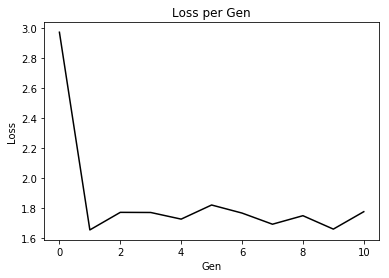

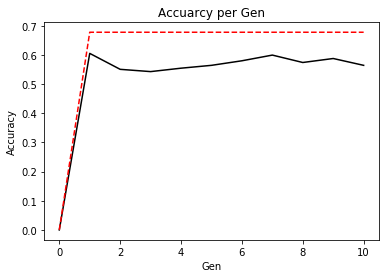

In [218]:
plt.plot(train_loss_hist, 'k-', label='Train Loss')
plt.plot(test_loss_hist, 'r--', label='Test Loss')
plt.title('Loss per Gen')
plt.xlabel('Gen')
plt.ylabel('Loss')
plt.show()


#plotting accuracy
plt.plot(train_acc, 'k-', label='Train acc')
plt.plot(test_acc, 'r--', label='Test acc')
plt.title('Accuarcy per Gen')
plt.xlabel('Gen')
plt.ylabel('Accuracy')
plt.show()

In [310]:
print(np.mean((train_acc[8:]))) 

0.859375
